<a href="https://colab.research.google.com/github/KOMBOU12/Marius/blob/main/Projet_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet no. 1**: Implémenter la méthode du gradient et du gradient stochastique pour le modèle logistique en adaptant les informations données pour le modèle de régression linéaire décrit ici.

Chargement du formatage personnalisé d'IPython.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(1337)

# load custom ipython formatting (ignore this)

kwargs = {'linewidth' : 3.5}
font = {'weight' : 'normal', 'size'   : 5}
matplotlib.rc('font', **font)

def error_plot(ys, yscale='log'):
    plt.figure(figsize=(4, 4))
    plt.xlabel('Step')
    plt.ylabel('Error')
    plt.yscale(yscale)
    plt.plot(range(len(ys)), ys, **kwargs)

Descente de **gradient**

In [ ]:
def gradient_descent(init, steps, grad, proj=lambda x: x):
    """Projected gradient descent.

    Inputs:
        initial: starting point
        steps: list of scalar step sizes
        grad: function mapping points to gradients
        proj (optional): function mapping points to points

    Returns:
        List of all points computed by projected gradient descent.
    """
    xs = [init]
    for step in steps:
        xs.append(proj(xs[-1] - step * grad(xs[-1])))
    return xs

Descente de **gradient Stochastique**

In [ ]:
def stochastic_gradient_descent(init, steps, A, b, proj=lambda x: x):
    """Stochastic Gradient Descent (SGD) with projection.

    Inputs:
        init: starting point (initial weights)
        steps: list of scalar step sizes (learning rates)
        grad: function that computes the gradient given a single data point and the current weights
        A: matrix of features
        b: vector of labels
        proj (optional): function mapping points to points

    Returns:
        List of all points computed by stochastic gradient descent.
    """
    xs = [init]

    m = A.shape[0]  # Number of samples

    for step in steps:
        # Randomly shuffle the indices of the dataset
        indices = np.random.permutation(m)

        for i in indices:
            # Select a single data point
            Ai = A[i, :].reshape(1, -1)
            bi = b[i]

            # Update the weights
            new_x = xs[-1] - step * logistic_regression_gradient(Ai, bi, xs[-1])

            # Apply the projection function
            xs.append(proj(new_x))

    return xs


Fonction de descente de **gradient stochastique avec mini-batch**

In [ ]:
def stochastic_gradient_descent_mini_batch(x0, steps, A, b, batch_size=32):
    xs = [x0]
    m = A.shape[0]
    for step in steps:
        idx = np.random.choice(m, batch_size, replace=False)
        A_batch = A[idx]
        b_batch = b[idx]
        grad = logistic_regression_gradient(A_batch, b_batch, xs[-1])
        xs.append(xs[-1] - step * grad)
    return xs

 La fonction de **perte logistique** est :
$\text{Loss} = \frac{1}{m} \sum_{i=1}^{m} \log\left(1 + \exp\left(-b_i \cdot (A_i \cdot x)\right)\right).
$ Les étiquettes pour cette fonction sont généralement 1 ou -1.

In [ ]:
def logistic_regression_loss(A, b, x):
    """Logistic regression objective."""
    # Calcul de z = A.dot(x)
    z = A.dot(x)

    # Calcul de la perte logistique
    loss = np.mean(np.log(1 + np.exp(-b * z)))

    return loss


Le gradient de la fonction de coût **logistique** par rapport aux paramètres $x$ est donné par :

$\nabla \text{Loss} = \frac{\partial \text{Loss}}{\partial x}$


Pour chaque paramètre $x_j$ (élément de $x$), la dérivée partielle est :

$\frac{\partial \text{Loss}}{\partial x_j} = \frac{1}{m} \sum_{i=1}^{m} \left( -b_i \cdot A_{ij} \cdot \frac{\exp(-b_i \cdot (A_i \cdot x))}{1 + \exp(-b_i \cdot (A_i \cdot x))} \right)$


Cette expression peut être simplifiée en utilisant la sortie de la fonction sigmoïde :

$\text{sigmoid}(z) = \frac{1}{1 + \exp(-z)}$


Donc, nous pouvons réécrire le gradient :

$\nabla \text{Loss} = \frac{1}{m} A^T \cdot (\text{sigmoid}(-b \cdot A \cdot x) - b)$

$\textbf{Gradient pour le vecteur } x$ :


Le gradient vectoriel complet est :

$\nabla \text{Loss} = \frac{1}{m} A^T \cdot \left( \frac{1}{1 + \exp(-b \cdot (A \cdot x))} - b \right)$




In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_gradient(A, b, x):
    """Gradient of logistic regression objective at x."""
    # Calculer z = A.dot(x)
    z = A.dot(x)


    # Calculer la sortie sigmoïde
    predictions = sigmoid(b * z)

    # Calculer le gradient
    m = A.shape[0]
    gradient = A.T.dot(predictions - b) / m

    return gradient


# **1-1 Cas m > n**

**1-1-1 Descente de gradient**
Dans cette étape on génère une matrice A de taille (1000, 100)  remplie de valeurs aléatoires. On prépare un ensemble de données synthétiques pour une régression logistique, on définit la fonction de coût et son gradient. On va chercher à trouver les coefficients optimaux.

On transforme notre vecteur b en vecteur binaire

In [ ]:
m, n = 1000, 100
A = np.random.normal(0, 1, (m, n))
x_opt = np.random.normal(0, 1, n)
noise = np.random.normal(0, 0.1, m)
b = A.dot(x_opt) + noise
# On transforme notre vecteur b en vecteur binaire de 1 et 0
b = (b > np.median(b)).astype(int)

Avant de faire la regression logistique, on fait une ACP pour voire si les données sont linéairement séparable.  La visualisation en deux dimensions permet de juger rapidement de la séparabilité linéaire des classes dans l’espace projeté par les deux premières composantes principales. Cette projection est une manière simple et intuitive de voir si les classes sont distinctes ou mélangées dans cet espace.

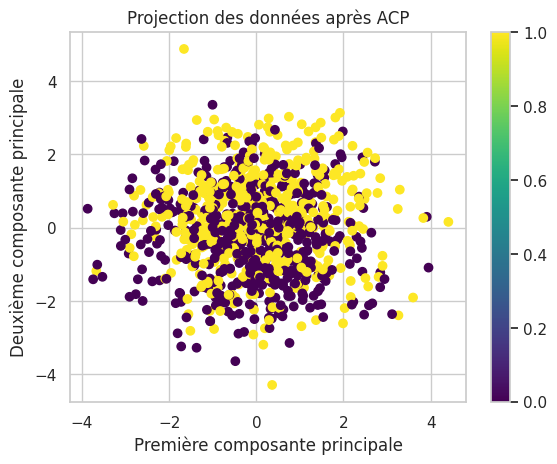

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
A_scaled = scaler.fit_transform(A)
# Appliquer l'ACP pour réduire à 2 dimensions
pca = PCA(n_components=2)
A_pca = pca.fit_transform(A_scaled)  # A_scaled correspond aux données standardisées

# Visualisation des données projetées
plt.scatter(A_pca[:, 0], A_pca[:, 1], c=b,  cmap='viridis')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Projection des données après ACP')
plt.colorbar()  # Pour afficher la barre de couleur associée aux classes
plt.show()

D'après la figure, il y'a une possibilité de mauvaise performance de la régression logistique.  On observe pas de frontière claire entre les deux classes dans cet espace de projection, ce qui suggère que la régression logistique pourrait avoir des difficultés à bien séparer ces classes.

On peut quand même essayer d'appliquer la régression logistique

In [ ]:
objective = lambda x: logistic_regression_loss(A, b, x)
gradient = lambda x: logistic_regression_gradient(A, b, x)

**Convergence objective**

Ici, on visualise le processus de descente de gradient pour optimiser les coefficients de la régression logistique, en comparant la convergence de la fonction de coût avec les niveaux de bruit et la solution optimale. Dans la fonction *gradient_descent*, [0.1]x100 représente **le pas de descente (0.1 est la longueur du pas et 100 le nombre de pas).**

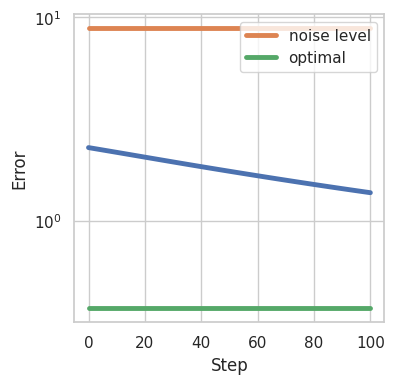

In [ ]:
x0 = np.random.normal(0, 1, n)
xs = gradient_descent(x0, [0.1]*100, gradient)
error_plot([objective(x) for x in xs])
plt.plot(range(len(xs)), [np.linalg.norm(noise)**2]*len(xs),
        label='noise level', **kwargs)
plt.plot(range(len(xs)), [logistic_regression_loss(A,b,x_opt)]*len(xs),
        label='optimal', **kwargs)
_ = plt.legend()

La courbe **bleu** montre que l'erreur (fonction de coût) diminue au fur et à mesure des itérations de la descente de gradient. La ligne **verte** représente probablement la perte optimale atteignable avec les paramètres optimaux $x_{opt}$.  Le bruit dans les données semble jouer un rôle important en limitant la performance du modèle, ce qui pourrait expliquer pourquoi l'erreur ne se rapproche pas beaucoup de l'optimum théorique.

**1-1-2 Descente de gradient Stochastique**

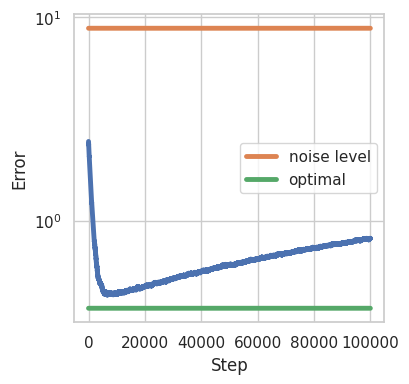

In [ ]:
x0 = np.random.normal(0, 1, n)
xs = stochastic_gradient_descent(x0, [0.01]*100, A, b, proj= lambda x: x)
error_plot([objective(x) for x in xs])
plt.plot(range(len(xs)), [np.linalg.norm(noise)**2]*len(xs),
        label='noise level', **kwargs)
plt.plot(range(len(xs)), [logistic_regression_loss(A,b,x_opt)]*len(xs),
        label='optimal', **kwargs)
_ = plt.legend()

On observe sur la courbe **bleu** une diminution initiale rapide de l'erreur au début. Cependant, après un certain point (~20,000 étapes), l'erreur commence à remonter, ce qui indique un problème de convergence. Cela signifie que le modèle ne continue pas à s'améliorer et qu'il peut même diverger avec le temps.

Pour améliorer la convergence du SGD, on peut utiliser un mini-batch SGD, avec plusieurs exemples par mise à jour, peut réduire la variance et améliorer la stabilité du modèle.


**Convergence en domaine**

On visualise le processus de descente de gradient pour optimiser les coefficients de la régression logistique, en comparant la convergence de la fonction de coût avec les niveaux de bruit et la solution optimale.

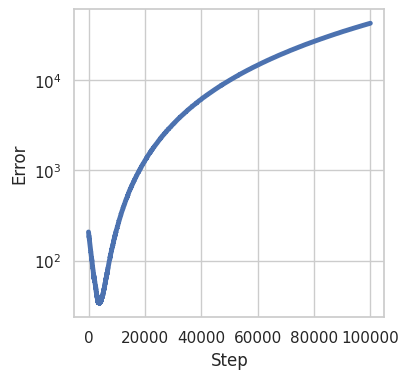

In [ ]:
error_plot([np.linalg.norm(x-x_opt)**2 for x in xs])

Le graphe indique que l'algorithme d'optimisation ne parvient pas à converger vers les paramètres optimaux et, au contraire, s'éloigne progressivement de ces paramètres.

# **2-1 Cas n > m**
# Dans ce cas nous sommes dans une situation de sur-paramétrisation.

**2-1-1 Descente de gradient** Dans cette étape on génère une matrice A de taille (100, 1000) remplie de valeurs aléatoires. On choit $x_{\text{opt}} = (A^T A)^{-1} A^T b$, on opte pour une solution qui minimise l'erreur quadratique entre les observations réelles $b$ et les observations estimées $A \times x$



In [ ]:
m, n = 100, 1000
A = np.random.normal(0, 1, (m, n))
b = np.random.normal(0, 1, m)
b = (b > np.median(b)).astype(int)

(100, 1000)


On commence par appliquer **l'ACP**

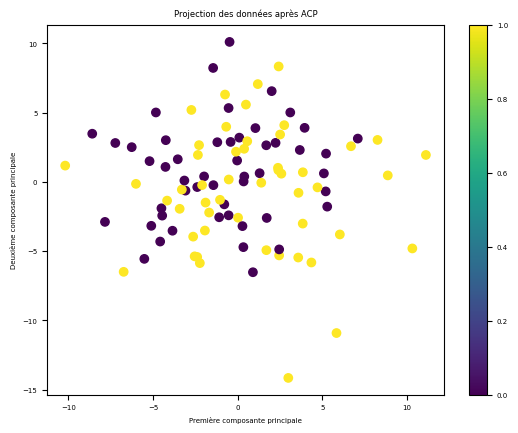

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
A_scaled = scaler.fit_transform(A)
# ACP pour réduire à 2 dimensions
pca = PCA(n_components=2)
A_pca = pca.fit_transform(A_scaled)  # A_scaled correspond aux données standardisées

# Visualiser les données projetées
plt.scatter(A_pca[:, 0], A_pca[:, 1], c=b,  cmap='viridis')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Projection des données après ACP')
plt.colorbar()  # Pour afficher la barre de couleur associée aux classes
plt.show()

 Comme les classes sont très enchevêtrées, la régression logistique, qui est un classificateur linéaire, pourrait ne pas être en mesure de capturer correctement la relation entre les caractéristiques et les classes. Le modèle risque de faire des erreurs et de ne pas bien séparer les classes.

Après avoir appliqué l'ACP on fait néanmoins une regression logistique avec descente de gradient

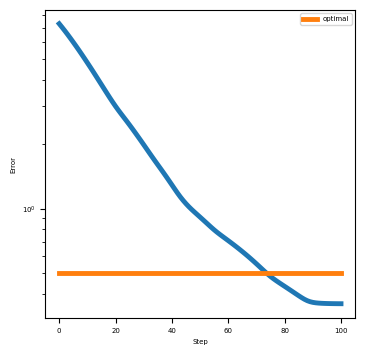

In [ ]:
# The least norm solution is given by the pseudo-inverse
x_opt = np.linalg.pinv(A).dot(b)
objective = lambda x: logistic_regression_loss(A, b, x)
gradient = lambda x: logistic_regression_gradient(A, b, x)


x0 = np.random.normal(0, 1, n)
xs = gradient_descent(x0, [0.1]*100, gradient)
error_plot([objective(x) for x in xs])
plt.plot(range(len(xs)), [logistic_regression_loss(A,b,x_opt)]*len(xs),
        label='optimal', **kwargs)
_ = plt.legend()

Le graphe montre que la descente de gradient fonctionne bien pour la régression logistique sur les données. L'erreur diminue de façon continue, atteignant une valeur proche de l'erreur optimale après environ 80 à 100 itérations. On  peut considérer que la régression logistique avec descente de gradient est bien adaptée à ce jeu de données dans cette configuration.

**Convergence objective**

**2-1-1 Descente de gradient stochastique**

# **3- Reproduction avec notre algorithme des expériences présentées dans le blog**



Dans cette partie nous allons commencer par commenter brièvement le travail de **Susan Li**. Et ensuite s'appuyer sur ce qu'elle a fait pour appliquer notre **algorithme de regression logistique avec descente de gradient et descente de gradient stochastique.**  

Elle commence par extraire les données de la base de donnée. Elle implémente toutes les libraries de Python qu'elle va utiliser par la suite

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Charger les données
url = 'https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv'
data = pd.read_csv(url)

In [ ]:
#On groupe les colonnes de type éducation
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

Elle crée des "dummy variables"

In [ ]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

Les colonnes finales sont :

In [ ]:
data_final=data[to_keep]

Separation des variables. Elle suréchantillonne les non-souscriptions en utilisant l'algorithme SMOTE.

In [ ]:
from sklearn.model_selection import train_test_split
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

Elle utilise Recursive Feature Elimination (RFE), qui repose sur l'idée de construire un modèle de manière répétée et de choisir soit la meilleure, soit la pire caractéristique en termes de performance.

In [ ]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]


In [ ]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown',
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"]
X=os_data_X[cols]
y=os_data_y['y']

In [ ]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate',
      'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"]
X=os_data_X[cols]
y=os_data_y['y']

Jusqu'à ce niveau on a exploité le travail de Susan Li qui a consisté à faire supprimer les colonnes qui n'avaient pas un impact important dans l'objectif de prediction qui est celui de savoir **si le client souscrira (1/0) à un dépôt à terme (variable y).** Elle a obtenu la matrice X (features) et la matrice y(target). Nous allons commencer par transformer ces matrices avant de les utiliser avec notre algorithme.

On va s'assurer que notre matrice A a toutes ses colonnes numériques et que les données sont correctement mis à l'échelle. On ajoute également une colonne de 1 à notre matrice caractéristique A. L'ajout d'une colonne de 1 à la matrice des caractéristiques avant d'appliquer la régression logistique sert à inclure un terme **d'intercept ou biais** dans le modèle de régression.

In [ ]:
from sklearn.preprocessing import StandardScaler

A = X.astype(int)

# Appliquer la normalisation des données
scaler = StandardScaler()
A = scaler.fit_transform(A)

# Ajouter une colonne de 1 à la matrice A
A = np.hstack([np.ones((A.shape[0], 1)), A])

b = y

La matrice A est de taille (51134, 17), on est dans le cas m>n

On fait l'ACP sur la matrice A

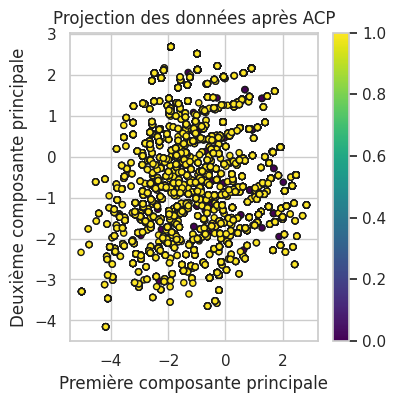

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
A_scaled = scaler.fit_transform(A)

from sklearn.decomposition import PCA
# On choisit 2 composantes principales
pca = PCA(n_components= 2)
A_pca = pca.fit_transform(A_scaled)

plt.figure(figsize=(4, 4))
plt.scatter(A_pca[:, 0], A_pca[:, 1], c=b, cmap='viridis', edgecolor='k', s=20)
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Projection des données après ACP')
plt.colorbar()  # Pour afficher la barre de couleur correspondant aux classes
plt.grid(True)
plt.show()


L'ACP montre que les données ne sont pas facilement linéairement séparables dans l'espace réduit à deux dimensions. Cela signifie que la régression logistique pourrait ne pas être optimale, mais elle peut toujours fournir des résultats raisonnables.

On applique notre algorithme de **regression logistique avec descente de gradient**

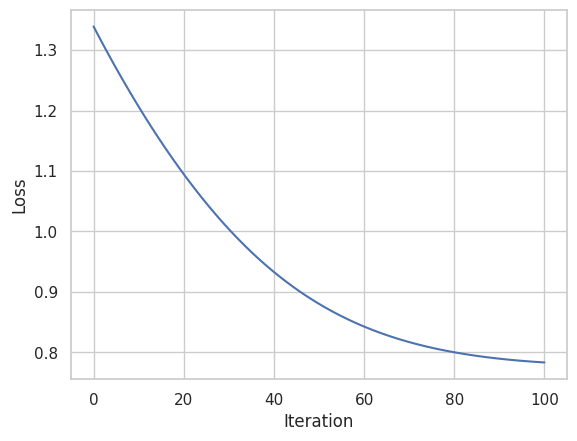

In [ ]:
# Initialiser x avec des valeurs aléatoires
x0 = np.random.normal(0, 1, A.shape[1])

# Définir les étapes de la descente de gradient
steps = [0.1] * 100

# Appliquer la descente de gradient
xs = gradient_descent(x0, steps, lambda x: logistic_regression_gradient(A, b, x))

# Afficher les résultats
import matplotlib.pyplot as plt
plt.plot([logistic_regression_loss(A, b, x) for x in xs])
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()


L'algorithme fonctionne bien dans les premières étapes (de 0 à environ 60), mais semble rencontrer des problèmes d'instabilité ou de surapprentissage vers la fin. Il peut être utile de réduire le taux d'apprentissage.

On applique ensuite notre algorithme de **regression logistique avec descente de gradient stochastique**

In [ ]:
x0 = np.random.normal(0, 1, A.shape[1])
x_opt = np.random.normal(0, 1, A.shape[1])
xs = stochastic_gradient_descent(x0, [0.01]*100, A, b, proj= lambda x: x)
error_plot([objective(x) for x in xs])
plt.plot(range(len(xs)), [np.linalg.norm(noise)**2]*len(xs),
        label='noise level', **kwargs)
plt.plot(range(len(xs)), [logistic_regression_loss(A,b,x_opt)]*len(xs),
        label='optimal', **kwargs)
_ = plt.legend()

<ipython-input-5-9c2f0d1597bb>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


La Descente de gradient stochastique prend beaucoup de temps parce que nous avons beaucoup de données. Une alternative serait d'utiliser la **descente de gradient stochastique par mini-batch.**

On implémente la descente de **gradient stochastique par mini-batch**. On obtient le résultat plus rapidement. Cela permet de mieux stabiliser les gradients tout en accélérant l'optimisation.

In [ ]:
def stochastic_gradient_descent_mini_batch(x0, steps, A, b, batch_size=32):
    xs = [x0]
    m = A.shape[0]
    for step in steps:
        idx = np.random.choice(m, batch_size, replace=False)
        A_batch = A[idx]
        b_batch = b[idx]
        grad = logistic_regression_gradient(A_batch, b_batch, xs[-1])
        xs.append(xs[-1] - step * grad)
    return xs


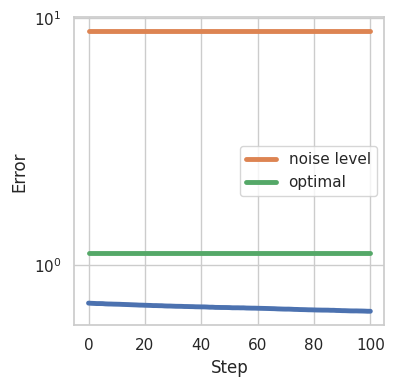

In [ ]:
x0 = np.random.normal(0, 1, A.shape[1])
x_opt = np.random.normal(0, 1, A.shape[1])
xs = stochastic_gradient_descent_mini_batch(x0, [0.01]*100, A, b, batch_size=32)
error_plot([objective(x) for x in xs])
plt.plot(range(len(xs)), [np.linalg.norm(noise)**2]*len(xs),
        label='noise level', **kwargs)
plt.plot(range(len(xs)), [logistic_regression_loss(A,b,x_opt)]*len(xs),
        label='optimal', **kwargs)
_ = plt.legend()

L'algorithme de **mini-batch SGD** semble améliorer légèrement l'erreur, mais le processus est très lent, et l'algorithme n'a pas encore convergé vers une solution optimale. Cela pourrait indiquer que le taux d'apprentissage utilisé (0.01) est peut-être trop faible pour ce problème, ce qui ralentit la convergence ou bien qu'on a besoin de plus d'itérations pour permettre à l'algorithme de converger pleinement.